# LPJ-GUESS data

In [159]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from dataset_manipulation import *
from plotting import *

## <div class="alert alert-success">Import and prepare the dataset</div>

### Gridlist: lon/lat

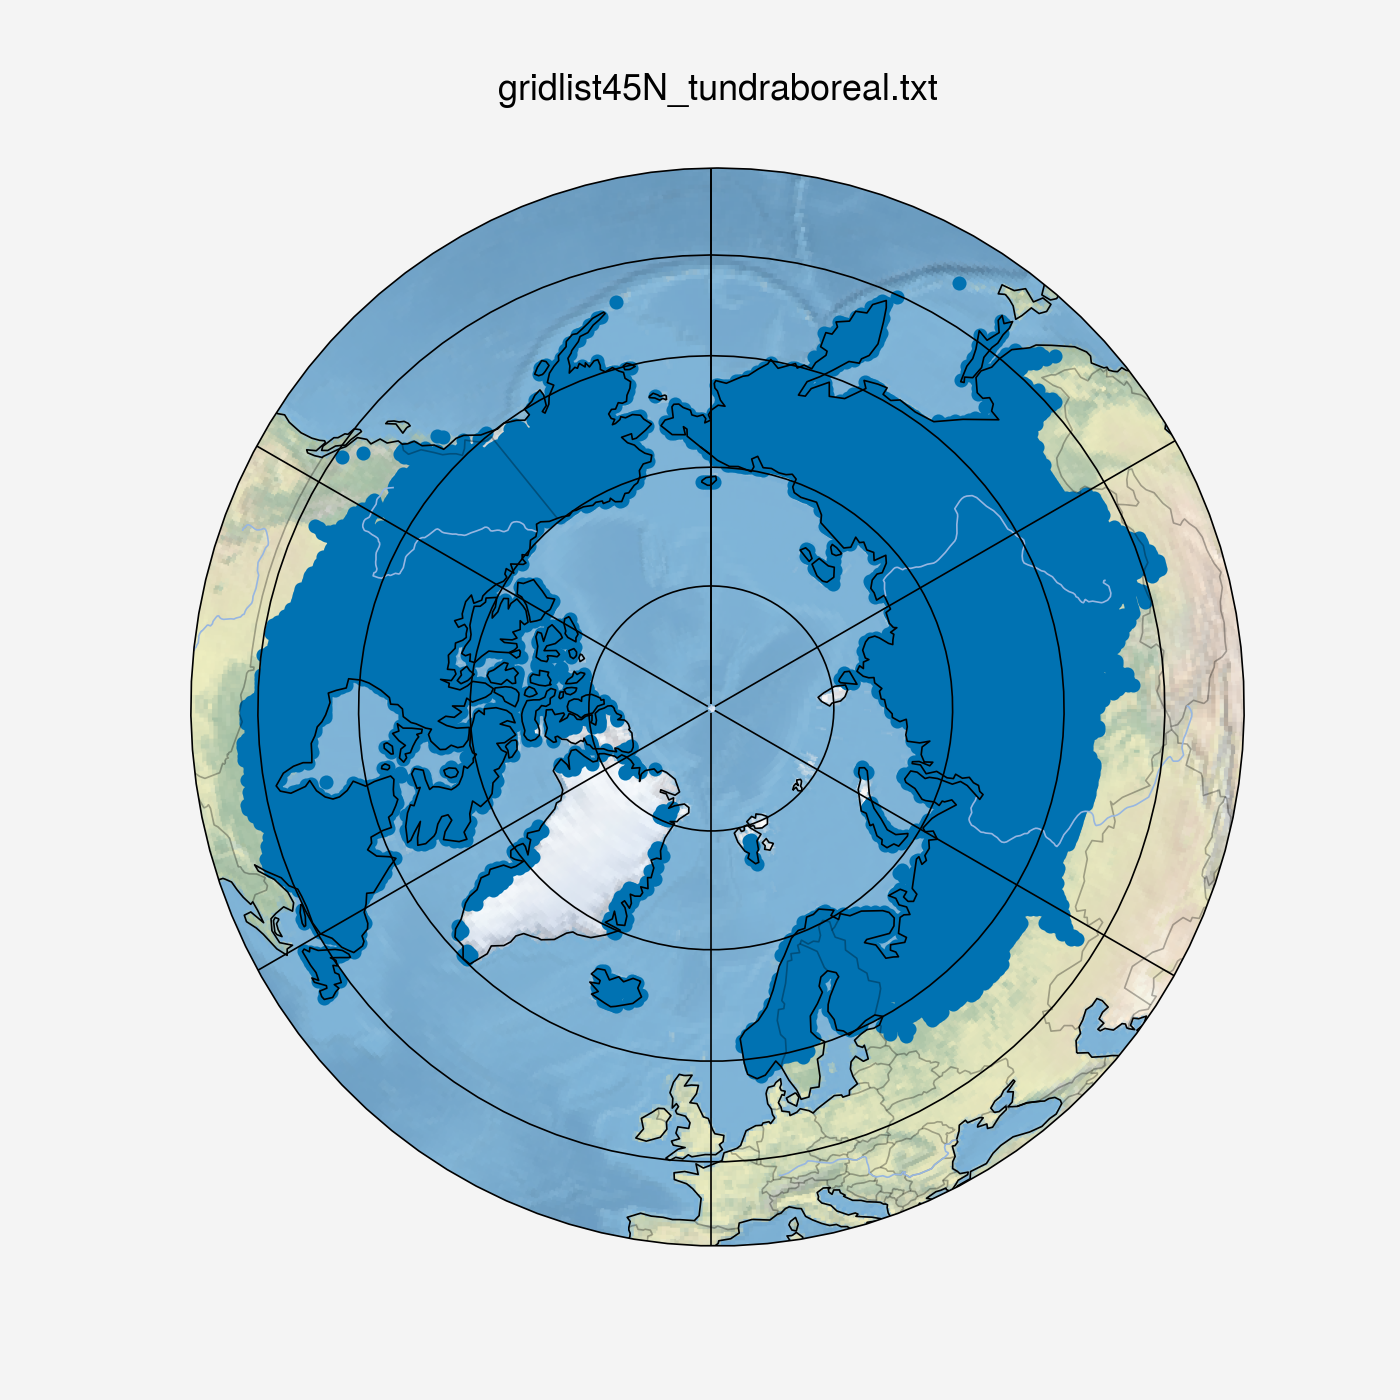

In [63]:
foldername = "../data/LPJ-GUESS/"
fn = 'gridlist45N_tundraboreal.txt'
lonlat = pd.read_csv(foldername+fn, sep="\t", header=None)
lonlat.columns = ['lon', 'lat']
#data.columns = ['LONGXY', 'LATIXY']
#data = data.to_xarray()
#data

fig = plt.figure(1, figsize=[7,7])
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
cut_extent_Orthographic(ax, lat=40)

lonlat.plot.scatter(ax=ax, x='lon', y='lat', transform = ccrs.PlateCarree())
ax_map_properties(ax, earth=True)
ax.set_title(fn,y=1.05,size='x-large') #, y=1.15, 
#plt.tight_layout()
plt.show()

### Land fraction of NAT PFT vs PEATLAND

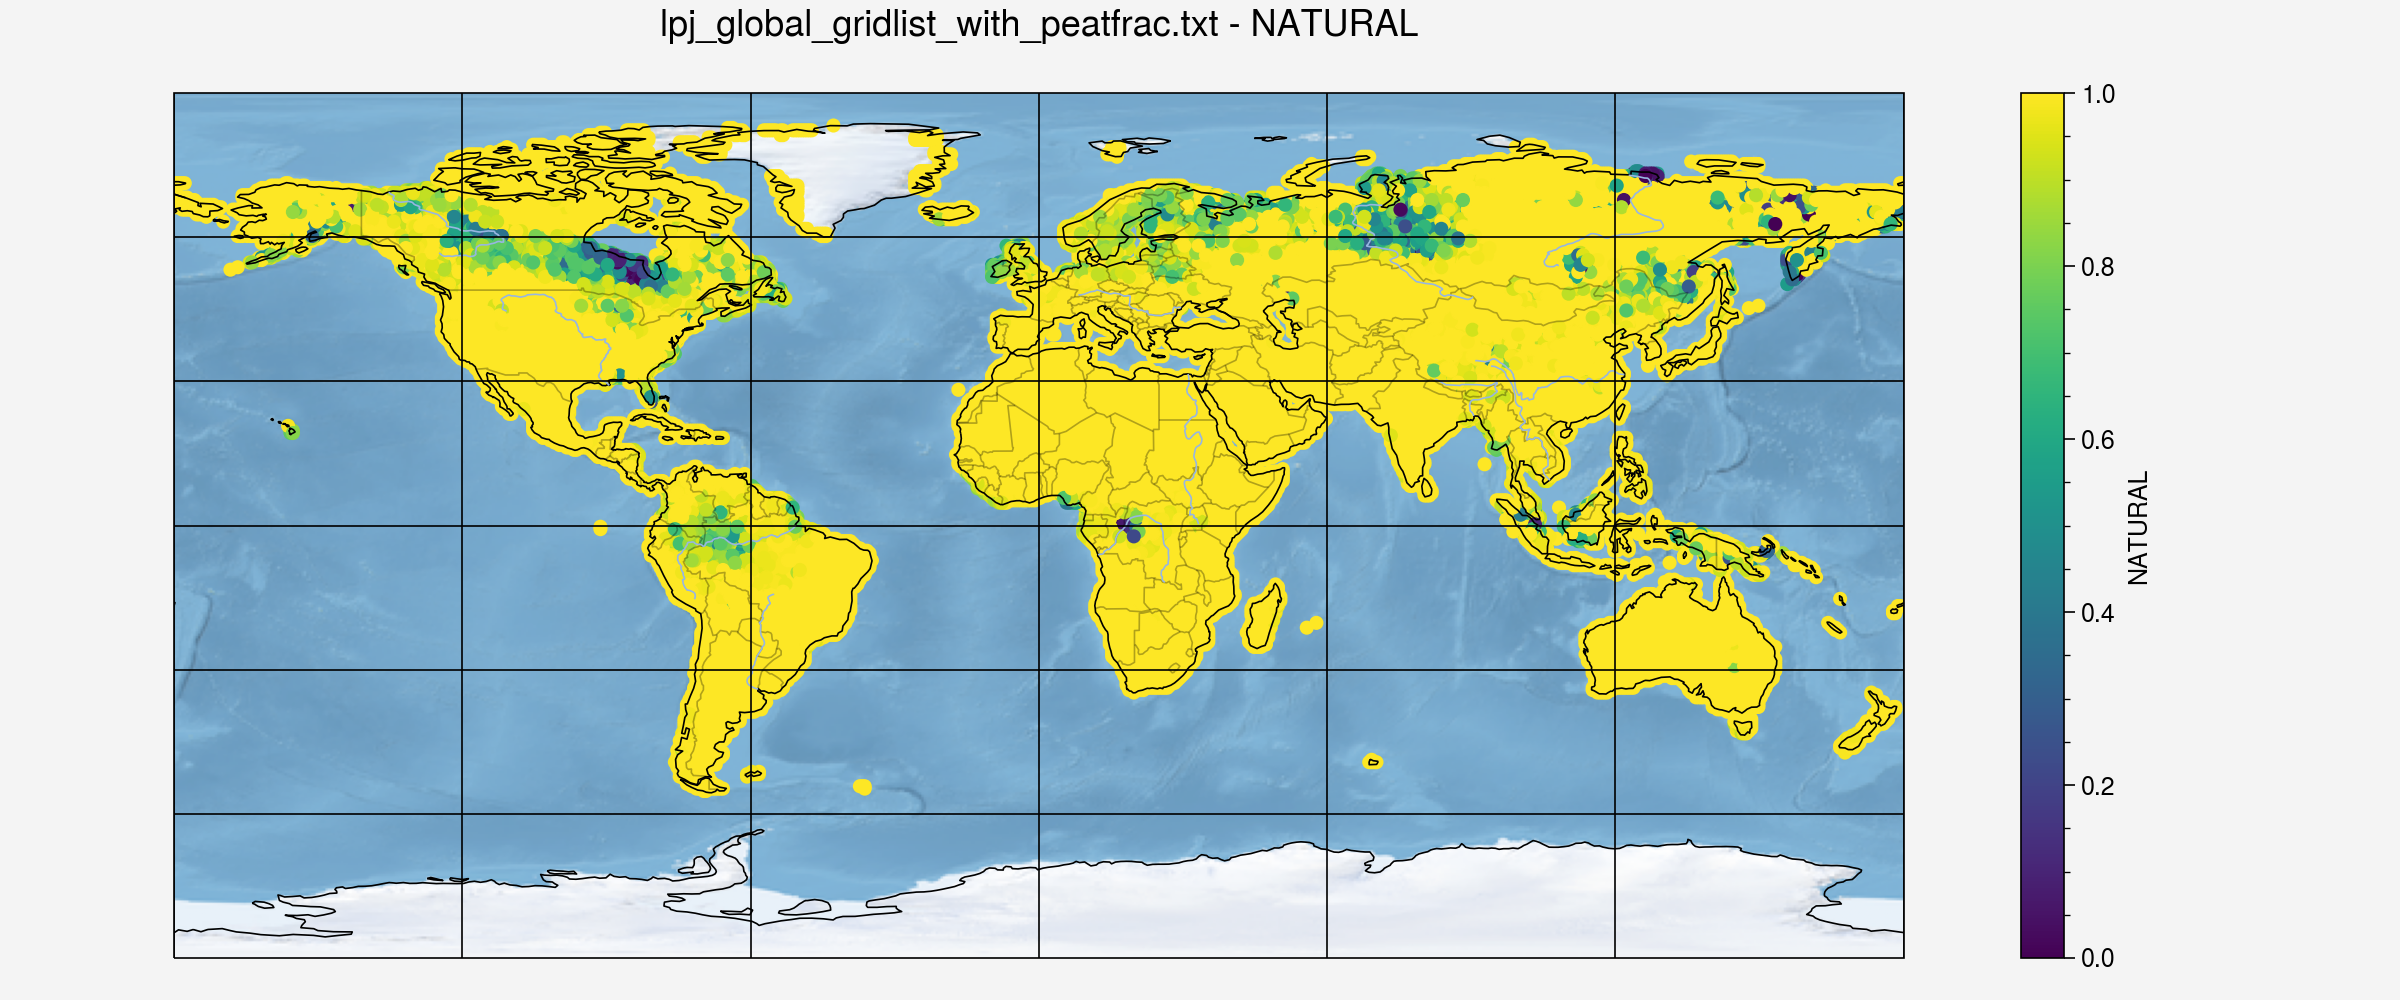

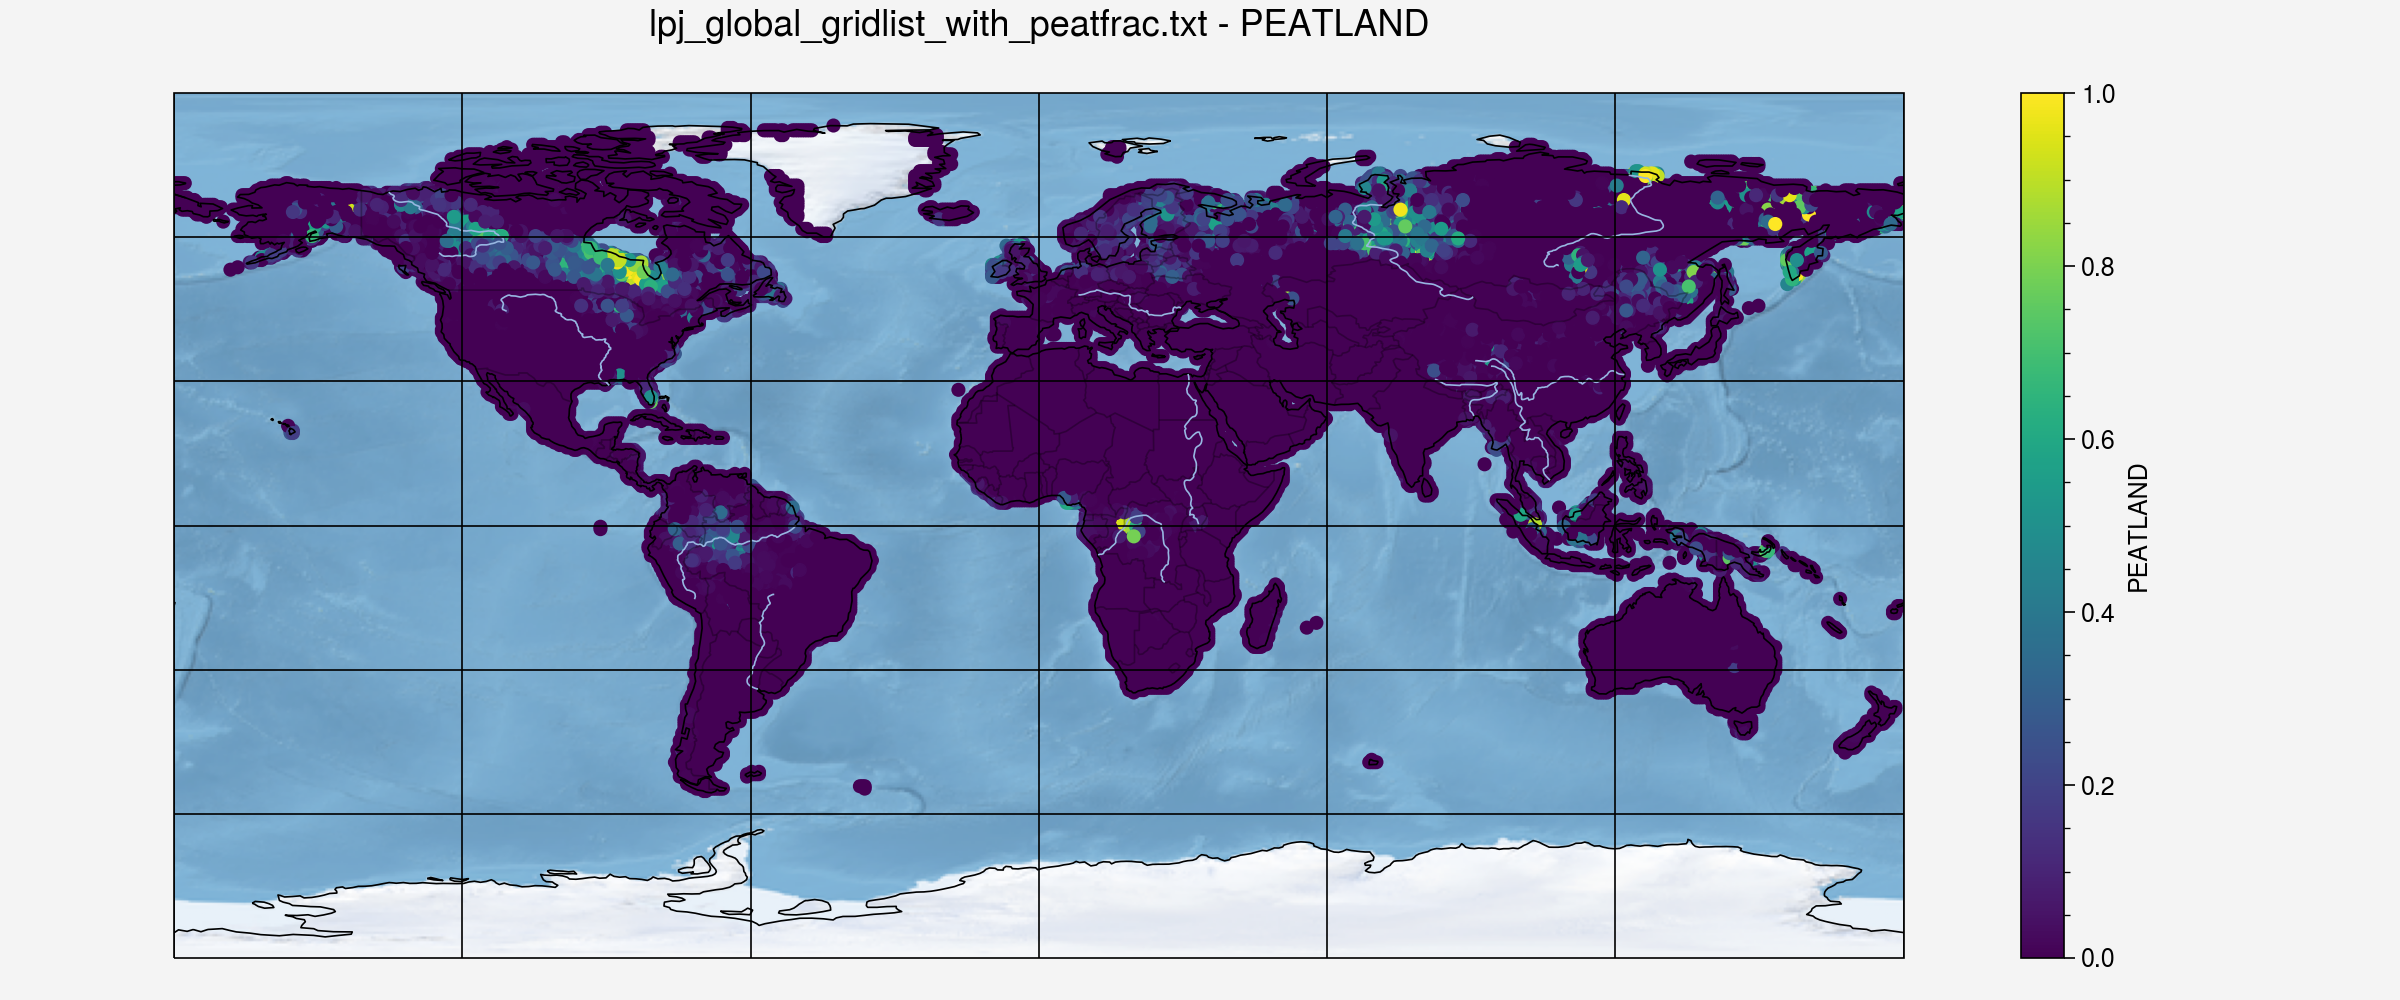

In [103]:
fn = 'lpj_global_gridlist_with_peatfrac.txt'
lndcover = pd.read_csv(foldername+fn, sep="\t")

fig = plt.figure(1, figsize=[12,5])
ax = plt.axes(projection=ccrs.PlateCarree())
#cut_extent_Orthographic(ax, lat=20)
lndcover.plot.scatter(ax=ax, x='Lon', y='Lat', c='NATURAL', cmap='viridis')
ax_map_properties(ax, earth=True)
ax.set_title(fn+' - NATURAL',y=1.05,size='x-large') #, y=1.15, 
plt.tight_layout()
plt.show()

fig = plt.figure(1, figsize=[12,5])
ax = plt.axes(projection=ccrs.PlateCarree())
#cut_extent_Orthographic(ax, lat=20)
lndcover.plot.scatter(ax=ax, x='Lon', y='Lat', c=lndcover.columns[3], vmin=0, vmax=1,cmap='viridis')
ax_map_properties(ax, earth=True)
ax.set_title(fn+' - PEATLAND',y=1.05,size='x-large') #, y=1.15, 
plt.tight_layout()
plt.show()

### LAI 1971 - 2000

In [207]:
fn = 'lai1971to2000.txt'
lai7100 = pd.read_csv(foldername+fn, delim_whitespace=True)#, index_col=[0,1])
lai7100.set_index(['Lat', 'Lon'], inplace=True)

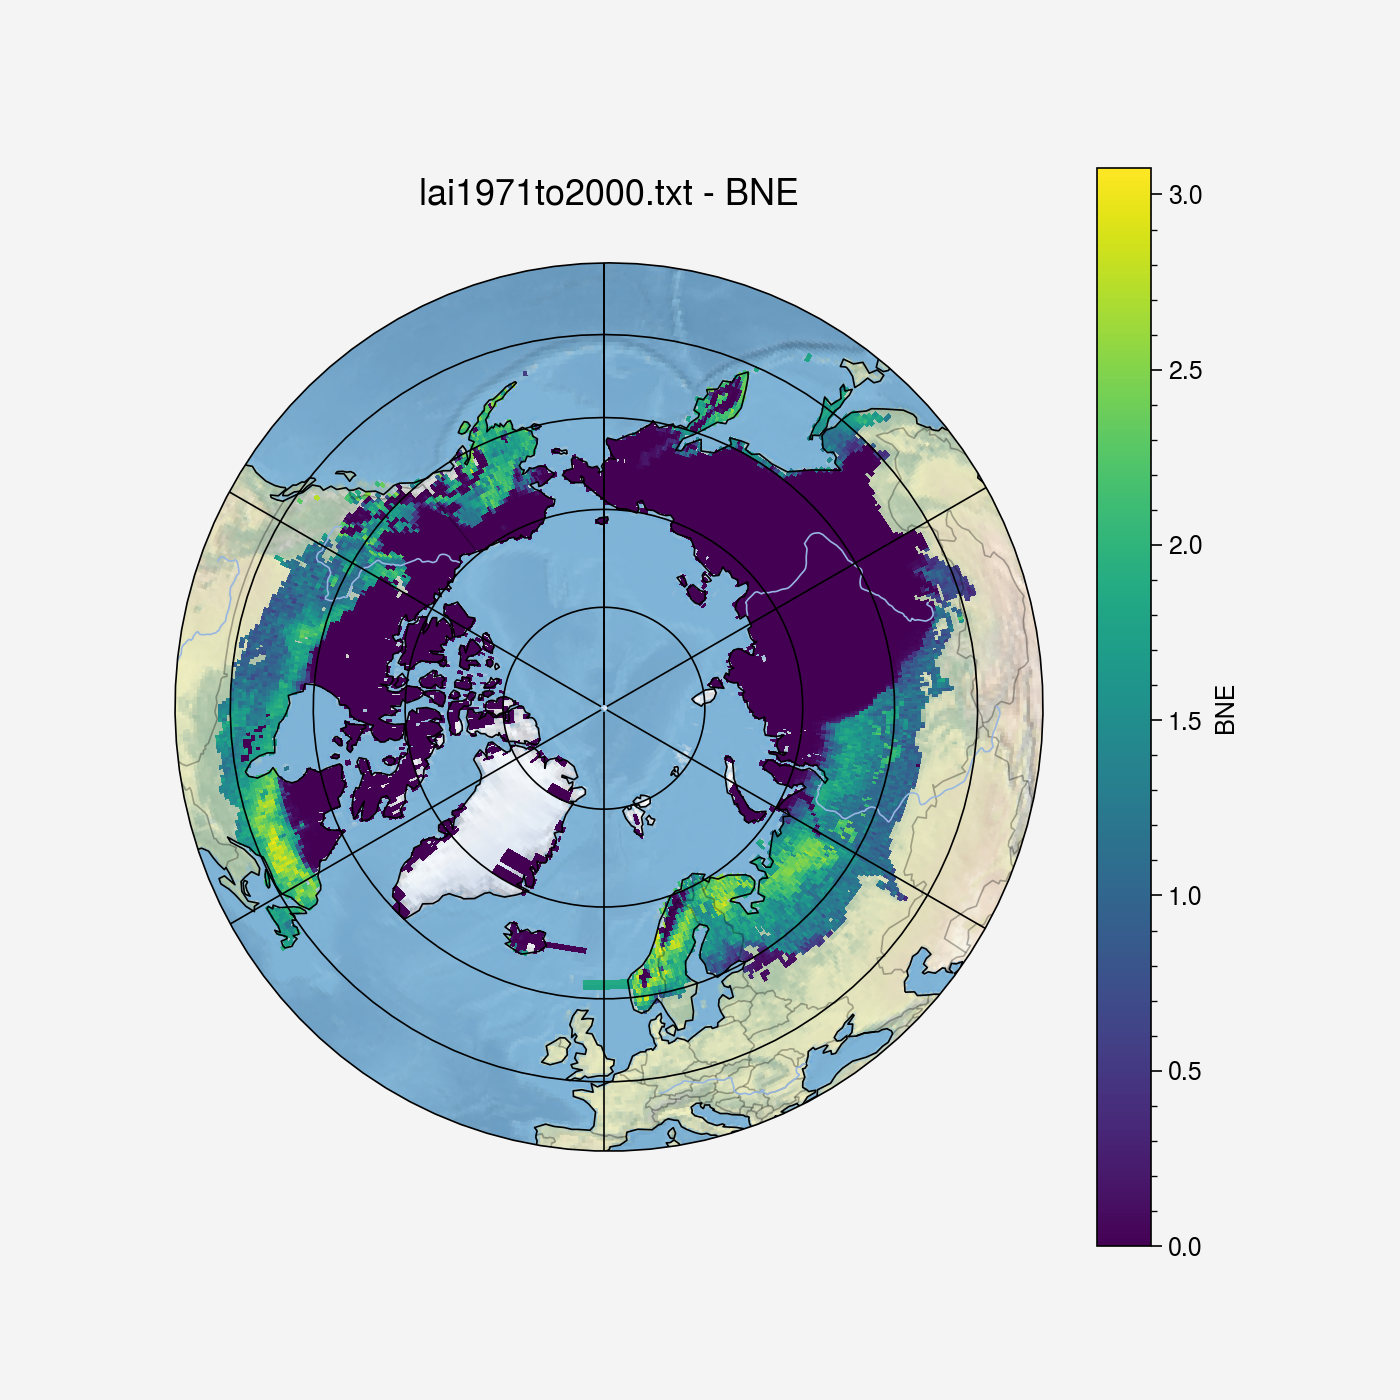

In [208]:
fig = plt.figure(1, figsize=[7,7])
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
cut_extent_Orthographic(ax, lat=40)
lai7100.to_xarray()['BNE'].plot(ax=ax, x='Lon', y='Lat', transform=ccrs.PlateCarree())
ax_map_properties(ax, earth=True)
ax.set_title(fn+ ' - BNE',y=1.05,size='x-large') #, y=1.15, 
#plt.tight_layout()
plt.show()

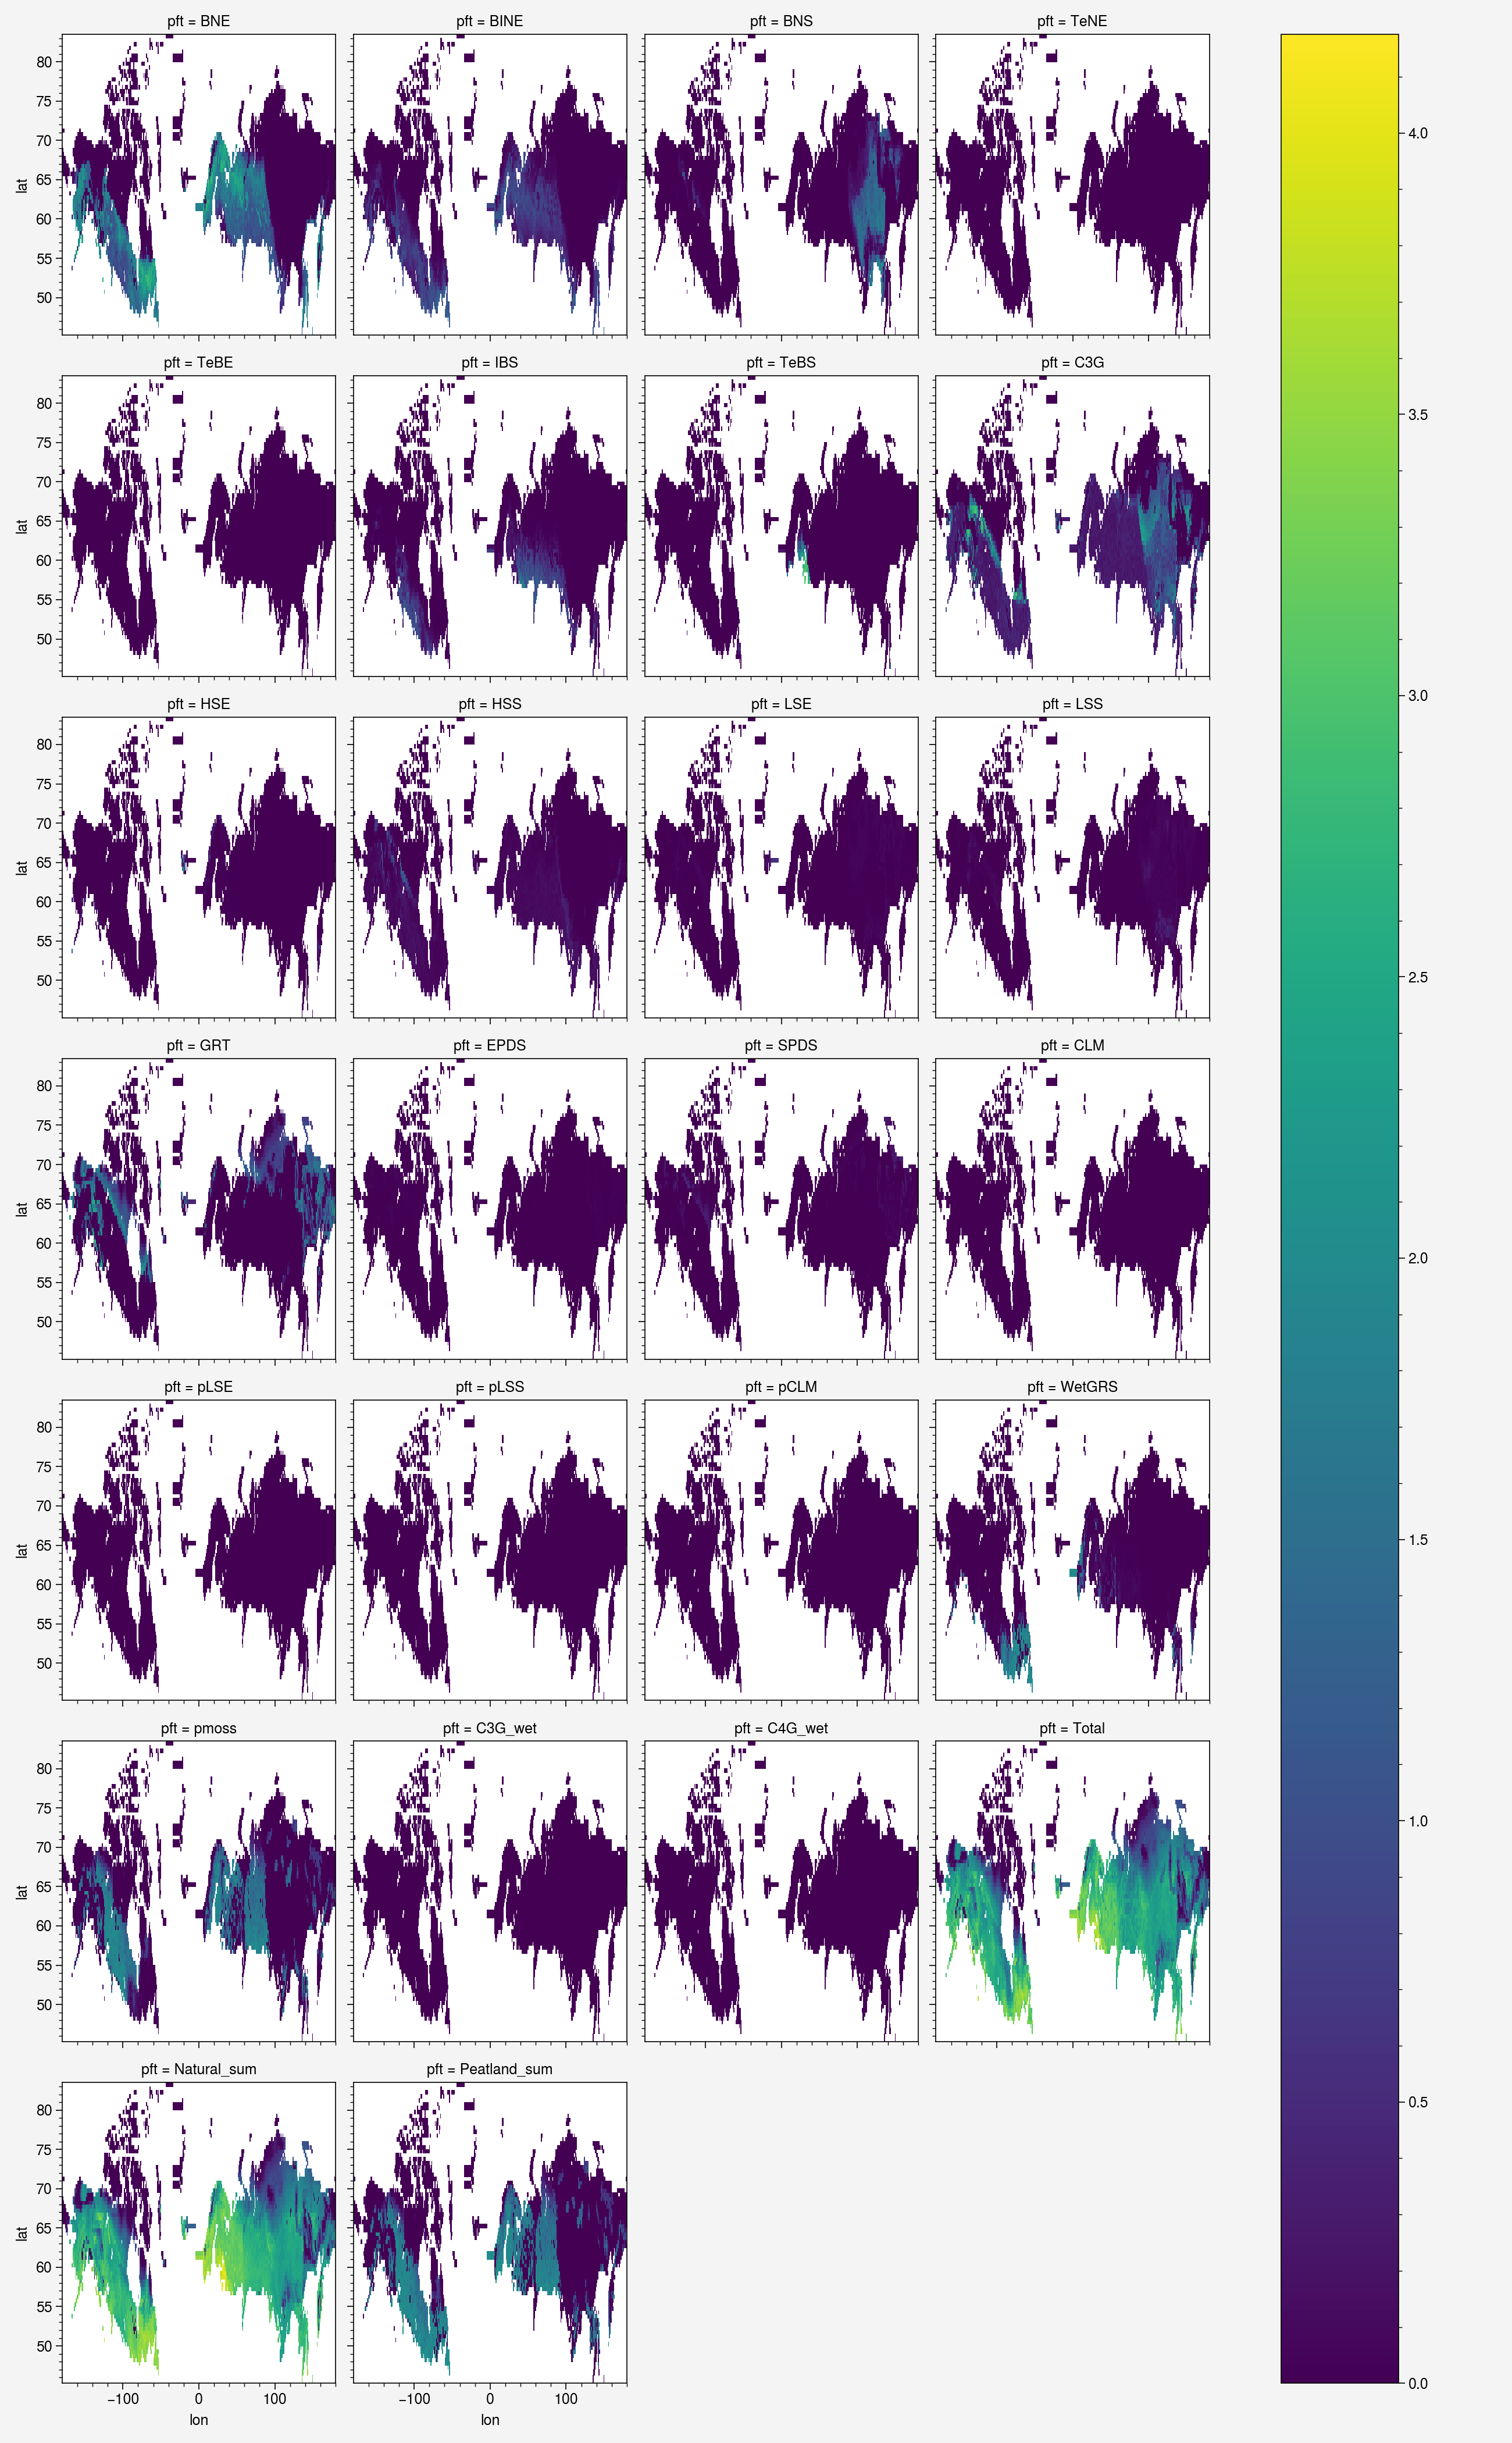

In [209]:
i_df = lai7100 # data is a dictionary of properly indexed dataframes
da = xr.DataArray(lai7100.values, coords={'lonlat':i_df.index,'pft':i_df.columns.values})#.assign_coords(expand_dims(['Lat', 'Lon'])#,dims=['lonlat','pft'])
da = da.unstack().rename({'Lat': 'lat', 'Lon': 'lon'})
da.plot(col='pft', col_wrap=4)

In [192]:
lai7100.to_xarray()

<xarray.Dataset>
Dimensions:       (Lat: 75, Lon: 638)
Coordinates:
  * Lat           (Lat) float64 45.75 46.75 47.25 47.75 ... 82.25 82.75 83.25
  * Lon           (Lon) float64 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
Data variables: (12/26)
    BNE           (Lat, Lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    BINE          (Lat, Lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    BNS           (Lat, Lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    TeNE          (Lat, Lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    TeBE          (Lat, Lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    IBS           (Lat, Lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    ...            ...
    pmoss         (Lat, Lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    C3G_wet       (Lat, Lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    C4G_wet       (Lat, Lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    Total         (Lat, Lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    Natural_sum   (Lat, Lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    Peatland_sum  (Lat, Lon) float64 nan nan nan nan nan ... nan nan nan nan nan

In [137]:
pft_names = list(lai7100.columns.values)


In [196]:
lai7100.columns = [i for i in range(len(pft_names))]
lai7100

0       1    2    3    4       5    6       7    8   \
Lat   Lon                                                                
57.25 -95.75   1.7220  0.5760  0.0  0.0  0.0  0.0112  0.0  0.2411  0.0   
      -95.25   1.7103  0.4146  0.0  0.0  0.0  0.0136  0.0  0.3090  0.0   
      -94.75   1.6124  0.4773  0.0  0.0  0.0  0.0087  0.0  0.4006  0.0   
      -94.25   1.7206  0.1560  0.0  0.0  0.0  0.0018  0.0  0.4363  0.0   
      -93.75   1.7208  0.1906  0.0  0.0  0.0  0.0022  0.0  0.4435  0.0   
...               ...     ...  ...  ...  ...     ...  ...     ...  ...   
72.25 -105.75  0.0000  0.0000  0.0  0.0  0.0  0.0000  0.0  0.0000  0.0   
      -105.25  0.0000  0.0000  0.0  0.0  0.0  0.0000  0.0  0.0000  0.0   
      -100.75  0.0000  0.0000  0.0  0.0  0.0  0.0000  0.0  0.0000  0.0   
      -100.25  0.0000  0.0000  0.0  0.0  0.0  0.0000  0.0  0.0000  0.0   
      -99.75   0.0000  0.0000  0.0  0.0  0.0  0.0000  0.0  0.0000  0.0   

                   9   ...   16   17   18      19      20   21   22      23  \
Lat   Lon              ...                                                    
57.25 -95.75   0.0920  ...  0.0  0.0  0.0  0.0093  1.5369  0.0  0.0  2.1088   
      -95.25   0.0956  ...  0.0  0.0  0.0  0.0108  1.5927  0.0  0.0  2.0214   
      -94.75   0.0841  ...  0.0  0.0  0.0  0.0106  1.6059  0.0  0.0  2.0362   
      -94.25   0.0191  ...  0.0  0.0  0.0  0.0084  1.5510  0.0  0.0  1.8017   
      -93.75   0.0359  ...  0.0  0.0  0.0  0.0148  1.6763  0.0  0.0  1.9249   
...               ...  ...  ...  ...  ...     ...     ...  ...  ...     ...   
72.25 -105.75  0.0000  ...  0.0  0.0  0.0  0.0000  0.0000  0.0  0.0  0.0098   
      -105.25  0.0000  ...  0.0  0.0  0.0  0.0000  0.0000  0.0  0.0  0.0092   
      -100.75  0.0000  ...  0.0  0.0  0.0  0.0000  0.0000  0.0  0.0  0.0071   
      -100.25  0.0000  ...  0.0  0.0  0.0  0.0000  0.0000  0.0  0.0  0.0076   
      -99.75   0.0000  ...  0.0  0.0  0.0  0.0000  0.0000  0.0  0.0  0.0070   

                   24      25  
Lat   Lon                      
57.25 -95.75   2.6493  1.5462  
      -95.25   2.5533  1.6035  
      -94.75   2.5926  1.6165  
      -94.25   2.3411  1.5594  
      -93.75   2.3998  1.6910  
...               ...     ...  
72.25 -105.75  0.0098  0.0000  
      -105.25  0.0092  0.0000  
      -100.75  0.0071  0.0000  
      -100.25  0.0076  0.0000  
      -99.75   0.0070  0.0000  

[16750 rows x 26 columns]

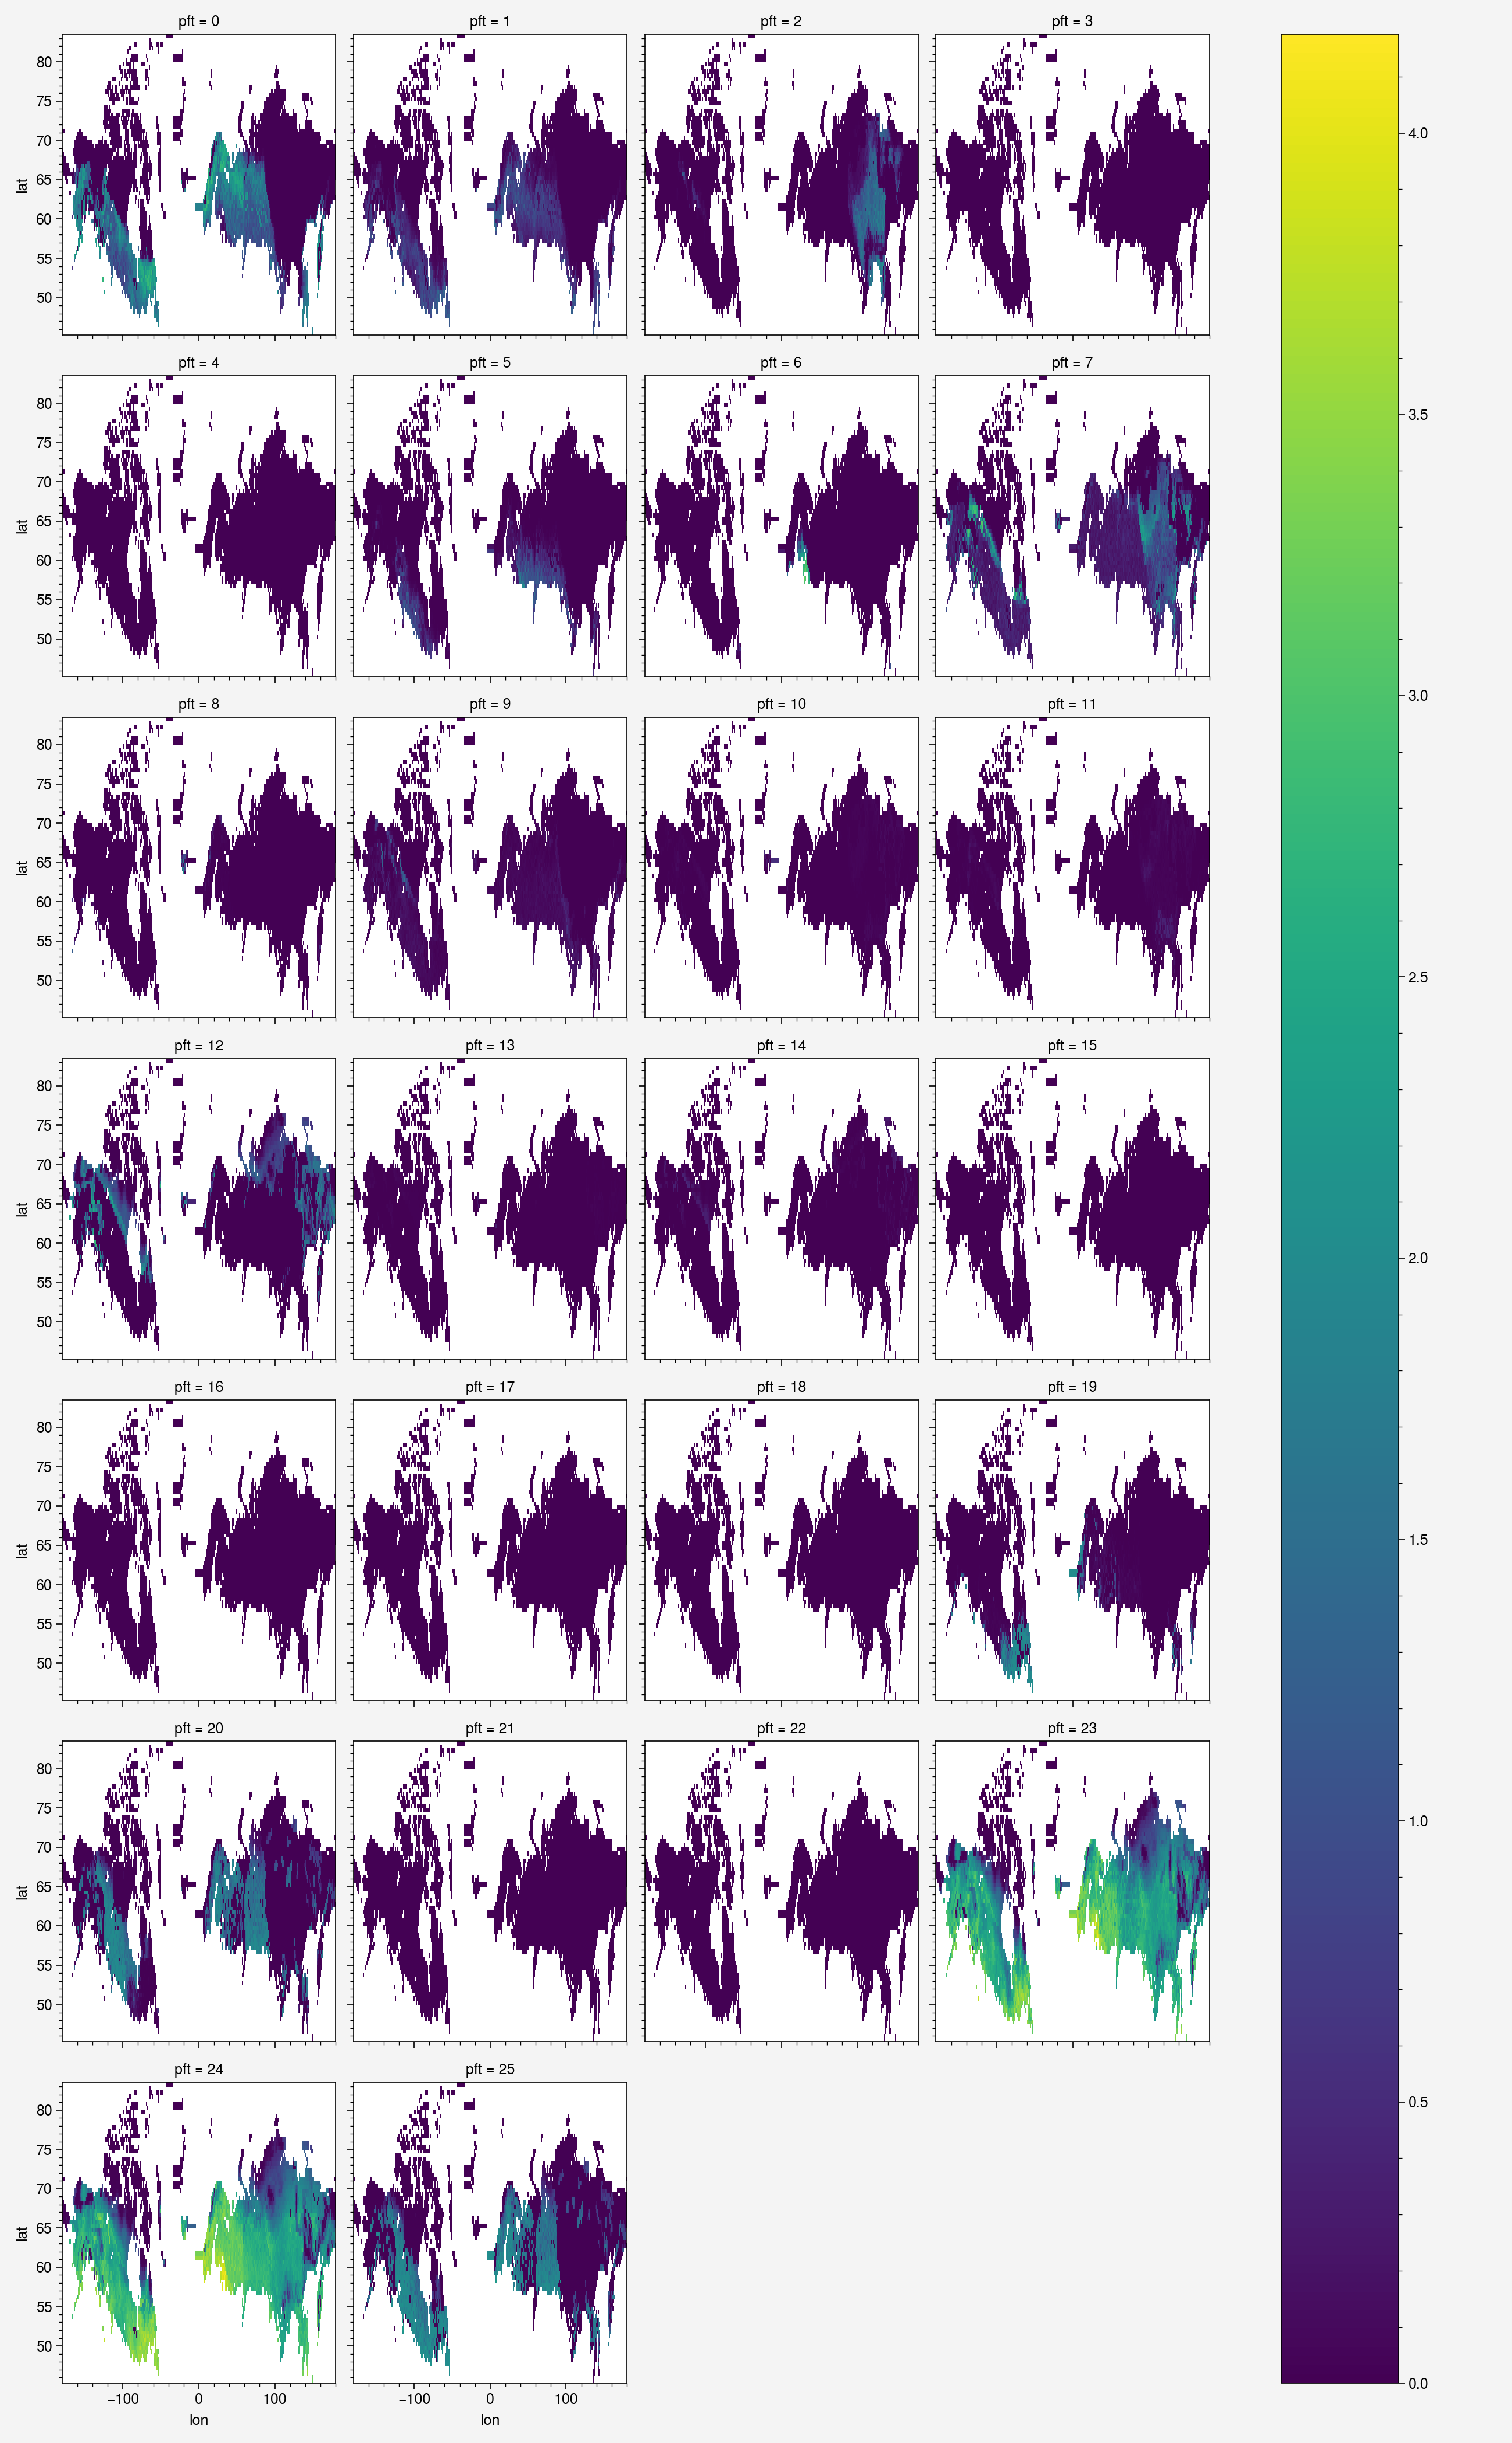

In [199]:
i_df = lai7100 # data is a dictionary of properly indexed dataframes
da = xr.DataArray(lai7100.values, coords={'lonlat':i_df.index,'pft':i_df.columns.values})#.assign_coords(expand_dims(['Lat', 'Lon'])#,dims=['lonlat','pft'])
da.unstack().rename({'Lat': 'lat', 'Lon': 'lon'})
.plot(col='pft', col_wrap=4)

In [189]:
da

<xarray.DataArray (Lat: 1, Lon: 1, lonlat: 16750, pft: 26)>
array([[[[1.722 , 0.576 , 0.    , ..., 2.1088, 2.6493, 1.5462],
         [1.7103, 0.4146, 0.    , ..., 2.0214, 2.5533, 1.6035],
         [1.6124, 0.4773, 0.    , ..., 2.0362, 2.5926, 1.6165],
         ...,
         [0.    , 0.    , 0.    , ..., 0.0071, 0.0071, 0.    ],
         [0.    , 0.    , 0.    , ..., 0.0076, 0.0076, 0.    ],
         [0.    , 0.    , 0.    , ..., 0.007 , 0.007 , 0.    ]]]])
Coordinates:
  * lonlat   (lonlat) MultiIndex
  - Lat      (lonlat) float64 57.25 57.25 57.25 57.25 ... 72.25 72.25 72.25
  - Lon      (lonlat) float64 -95.75 -95.25 -94.75 ... -100.8 -100.2 -99.75
  * pft      (pft) int64 0 1 2 3 4 5 6 7 8 9 ... 16 17 18 19 20 21 22 23 24 25
Dimensions without coordinates: Lat, Lon

In [153]:
pft = pd.read_csv(foldername+fn, delim_whitespace=True)
pft = pft.drop(columns=['Lon', 'Lat']).T
pft.index = [i for i in range(len(pft_names))]
pft.index.name

0       1       2       3       4       5       6       7       8      \
0   1.7220  1.7103  1.6124  1.7206  1.7208  1.5941  1.7091  0.0000  0.0000   
1   0.5760  0.4146  0.4773  0.1560  0.1906  0.2518  0.2118  0.0000  0.0000   
2   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
3   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
4   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
5   0.0112  0.0136  0.0087  0.0018  0.0022  0.0030  0.0026  0.0002  0.0001   
6   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
7   0.2411  0.3090  0.4006  0.4363  0.4435  0.5090  0.3478  0.0000  0.0000   
8   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
9   0.0920  0.0956  0.0841  0.0191  0.0359  0.0436  0.0432  0.0026  0.0048   
10  0.0019  0.0028  0.0028  0.0025  0.0023  0.0030  0.0019  0.0130  0.0141   
11  0.0052  0.0073  0.0066  0.0048  0.0046  0.0059  0.0037  0.0119  0.0132   
12  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  1.9941  1.9704   
13  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0251  0.0199   
14  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0614  0.0557   
15  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
16  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
17  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
18  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
19  0.0093  0.0108  0.0106  0.0084  0.0148  0.0055  0.0068  0.0037  0.0000   
20  1.5369  1.5927  1.6059  1.5510  1.6763  1.6349  1.5131  0.5058  0.0000   
21  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
22  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
23  2.1088  2.0214  2.0362  1.8017  1.9249  1.8791  1.8240  2.0764  2.0782   
24  2.6493  2.5533  2.5926  2.3411  2.3998  2.4103  2.3202  2.1084  2.0782   
25  1.5462  1.6035  1.6165  1.5594  1.6910  1.6405  1.5199  0.5095  0.0000   

     9      ...   16740   16741   16742   16743   16744   16745   16746  \
0   0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
1   0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
2   0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
3   0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
4   0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
5   0.0001  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
6   0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
7   0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
8   0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
9   0.0021  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
10  0.0113  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
11  0.0088  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
12  1.5921  ...  0.0023  0.0026  0.0022  0.0023  0.0028  0.0025  0.0023   
13  0.0307  ...  0.0060  0.0061  0.0048  0.0044  0.0044  0.0056  0.0054   
14  0.0594  ...  0.0025  0.0026  0.0013  0.0014  0.0015  0.0016  0.0015   
15  0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
16  0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
17  0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
18  0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
19  0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
20  0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
21  0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
22  0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
23  1.7045  ...  0.0108  0.0114  0.0082  0.0081  0.0087  0.0098  0.0092   
24  1.7045  ...  0.0108

In [154]:
lai = lai7100.T
lai.index.name = 'pft'
lai

Lat   57.25                                                                  \
Lon -95.75  -95.25  -94.75  -94.25  -93.75  -93.25  -92.75  -76.25  -75.75    
pft                                                                           
0    1.7220  1.7103  1.6124  1.7206  1.7208  1.5941  1.7091  0.0000  0.0000   
1    0.5760  0.4146  0.4773  0.1560  0.1906  0.2518  0.2118  0.0000  0.0000   
2    0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
3    0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
4    0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
5    0.0112  0.0136  0.0087  0.0018  0.0022  0.0030  0.0026  0.0002  0.0001   
6    0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
7    0.2411  0.3090  0.4006  0.4363  0.4435  0.5090  0.3478  0.0000  0.0000   
8    0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
9    0.0920  0.0956  0.0841  0.0191  0.0359  0.0436  0.0432  0.0026  0.0048   
10   0.0019  0.0028  0.0028  0.0025  0.0023  0.0030  0.0019  0.0130  0.0141   
11   0.0052  0.0073  0.0066  0.0048  0.0046  0.0059  0.0037  0.0119  0.0132   
12   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  1.9941  1.9704   
13   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0251  0.0199   
14   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0614  0.0557   
15   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
16   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
17   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
18   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
19   0.0093  0.0108  0.0106  0.0084  0.0148  0.0055  0.0068  0.0037  0.0000   
20   1.5369  1.5927  1.6059  1.5510  1.6763  1.6349  1.5131  0.5058  0.0000   
21   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
22   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
23   2.1088  2.0214  2.0362  1.8017  1.9249  1.8791  1.8240  2.0764  2.0782   
24   2.6493  2.5533  2.5926  2.3411  2.3998  2.4103  2.3202  2.1084  2.0782   
25   1.5462  1.6035  1.6165  1.5594  1.6910  1.6405  1.5199  0.5095  0.0000   

Lat          ...   72.25                                                  \
Lon -75.25   ... -108.75 -107.75 -107.25 -106.75 -106.25 -105.75 -105.25   
pft          ...                                                           
0    0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
1    0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
2    0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
3    0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
4    0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
5    0.0001  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
6    0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
7    0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
8    0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
9    0.0021  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
10   0.0113  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
11   0.0088  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
12   1.5921  ...  0.0023  0.0026  0.0022  0.0023  0.0028  0.0025  0.0023   
13   0.0307  ...  0.0060  0.0061  0.0048  0.0044  0.0044  0.0056  0.0054   
14   0.0594  ...  0.0025  0.0026  0.0013  0.0014  0.0015  0.0016  0.0015   
15   0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
16   0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
17   0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
18   0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
19   0.0000  ...  0.0000  0.0000  0.

In [156]:
lai7100.to_xarray()

<xarray.Dataset>
Dimensions:  (Lat: 75, Lon: 638)
Coordinates:
  * Lat      (Lat) float64 45.75 46.75 47.25 47.75 ... 81.75 82.25 82.75 83.25
  * Lon      (Lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
Data variables: (12/26)
    0        (Lat, Lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1        (Lat, Lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    2        (Lat, Lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    3        (Lat, Lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    4        (Lat, Lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    5        (Lat, Lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    ...       ...
    20       (Lat, Lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    21       (Lat, Lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    22       (Lat, Lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    23       (Lat, Lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    24       (Lat, Lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    25       (Lat, Lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [162]:
import itertools

data = {}
for i in np.arange(500):
    data[i] = pd.DataFrame(np.random.randn(1000, 8), index=pd.date_range(start='01.01.2013',periods=1000,freq='h'),
                    columns=list('ABCDEFGH'))
df_catalogue = pd.DataFrame(np.random.choice(10,(500, 3)), columns=['temp','pre','zon'])


In [165]:
data[0]

A         B         C         D         E  \
2013-01-01 00:00:00 -0.588774  0.279092  0.313244  1.842589  0.948732   
2013-01-01 01:00:00  1.924209 -1.386106  0.591899  0.268880 -0.972681   
2013-01-01 02:00:00 -0.141783  0.278874 -2.469108 -0.765901  0.247284   
2013-01-01 03:00:00 -1.076775 -1.893566  0.703692 -1.707464 -1.986664   
2013-01-01 04:00:00 -0.890239  0.652016  0.205528  1.490891  0.303691   
...                       ...       ...       ...       ...       ...   
2013-02-11 11:00:00  1.029301 -0.069501  1.010418  1.483772 -0.056851   
2013-02-11 12:00:00  2.130872 -0.288641  0.230377 -0.627027 -0.780153   
2013-02-11 13:00:00  0.301778  0.747244  0.927420  0.713431  0.633164   
2013-02-11 14:00:00 -0.359833  1.037132  0.488398 -2.213081 -0.571043   
2013-02-11 15:00:00 -1.689524 -0.577675 -0.828867  2.168083 -0.893122   

                            F         G         H  
2013-01-01 00:00:00  1.153706 -2.046486  0.176762  
2013-01-01 01:00:00  0.834054  0.817802 -0.579751  
2013-01-01 02:00:00  0.269570  0.355362  2.185990  
2013-01-01 03:00:00  0.095696 -2.488123  1.905606  
2013-01-01 04:00:00 -1.030397 -0.153190  1.059854  
...                       ...       ...       ...  
2013-02-11 11:00:00  1.815998 -1.174063  1.300521  
2013-02-11 12:00:00  0.047282  1.610708 -0.897181  
2013-02-11 13:00:00 -0.522685  0.233792 -0.725093  
2013-02-11 14:00:00  0.654878  0.543879  1.511265  
2013-02-11 15:00:00  0.341785  0.694606  1.453489  

[1000 rows x 8 columns]

In [169]:
i_df = data[0] # data is a dictionary of properly indexed dataframes
da = xr.DataArray(i_df.values,
                   coords={'time':i_df.index.values,'runs':i_df.columns.values},
                   dims=['time','runs'])

In [170]:
da

<xarray.DataArray (time: 1000, runs: 8)>
array([[-0.58877449,  0.27909178,  0.31324358, ...,  1.15370598,
        -2.04648586,  0.17676163],
       [ 1.92420939, -1.38610608,  0.59189874, ...,  0.83405386,
         0.81780241, -0.5797506 ],
       [-0.14178271,  0.2788742 , -2.46910829, ...,  0.26956984,
         0.35536187,  2.18599023],
       ...,
       [ 0.30177765,  0.74724408,  0.92742048, ..., -0.52268453,
         0.23379159, -0.72509286],
       [-0.35983277,  1.03713235,  0.48839845, ...,  0.65487842,
         0.54387873,  1.51126523],
       [-1.6895242 , -0.57767522, -0.82886657, ...,  0.34178518,
         0.69460554,  1.45348928]])
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2013-02-11T15:00:00
  * runs     (runs) object 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'

In [ ]:


data = pd.read_csv('output_list.txt', sep=" ")#, header=None)
#data.columns = ["a", "b", "c", "etc."]

In [28]:
fn_url = "https://www.dropbox.com/sh/m51ks49hxt2bmta/AACAbxio0XN5xGwOWW_PoCdea/gridlist45N_tundraboreal.txt?dl=0"


In [34]:
fn_url_f= "https://www.dropbox.com/sh/m51ks49hxt2bmta/AACAbxio0XN5xGwOWW_PoCdea?dl=1"

In [20]:
url = fn_url  # dl=1 is important
import urllib.request
u = urllib.request.urlopen(url)
data = u.read()
u.close()
 
with open([filename], "wb") as f :
    f.write(data)

NameError: name 'filename' is not defined

In [29]:
import pandas as pd
import urllib.request

data = pd.read_csv(fn_url, sep=" ", error_bad_lines=False)#, header=None)
#data.columns = ["a", "b", "c", "etc."]

b'Skipping line 5: expected 8 fields, saw 14\nSkipping line 6: expected 8 fields, saw 11\nSkipping line 7: expected 8 fields, saw 14\nSkipping line 8: expected 8 fields, saw 17\nSkipping line 9: expected 8 fields, saw 13\nSkipping line 10: expected 8 fields, saw 9\nSkipping line 13: expected 8 fields, saw 39\nSkipping line 14: expected 8 fields, saw 23\nSkipping line 17: expected 8 fields, saw 15\nSkipping line 18: expected 8 fields, saw 34\nSkipping line 19: expected 8 fields, saw 17\nSkipping line 20: expected 8 fields, saw 17\nSkipping line 21: expected 8 fields, saw 19\nSkipping line 22: expected 8 fields, saw 13\nSkipping line 23: expected 8 fields, saw 13\nSkipping line 24: expected 8 fields, saw 13\nSkipping line 25: expected 8 fields, saw 14\nSkipping line 26: expected 8 fields, saw 16\nSkipping line 27: expected 8 fields, saw 17\nSkipping line 28: expected 8 fields, saw 13\nSkipping line 29: expected 8 fields, saw 17\nSkipping line 30: expected 8 fields, saw 14\nSkipping line 

In [30]:
display(data)

<!DOCTYPE  \
0                                       window._goch_   
1                    window.addEventListener('click',   
2                                                 NaN   
3                                                 NaN   
4                                                  },   
5                                                 NaN   
6   define("metaserver/static/js/modules/constants...   
7                                                  /*   
8                            require.config({context:   
9                                                 });   
10                                   </script><script   
11                                                  ;   
12                                                }),   
13                                                  ;   
14                                                }),   
15                                                }),   
16                                                var   
17                                                }),   
18  PrivacyConsentPlatform.initialize_module({ifra...   
19                                                }),   
20                                                }),   
21                                                 /*   
22                                       window.React   
23                                                }),   

                                           html><html  \
0                                                   =   
1                                     function(event)   
2                                                 NaN   
3                                                 NaN   
4                                              true);   
5                                                 NaN   
6                                                 [],   
7                                             global:   
8   externals})(["metaserver/static/js/modules/con...   
9                                                 NaN   
10                             type="text/javascript"   
11                                                NaN   
12           require-tier-appshell-jquery],[["react",   
13                                                NaN   
14           require-tier-appshell-require-react]]]);   
15  require-tier-react_pagelet_done_metaserver/sta...   
16                                               init   
17  require-tier-init_react_metaserver/static/js/m...   
18                               consent.dropbox.com,   
19  ],[["metaserver/static/js/clean/web_timing_log...   
20  require-tier-require-and-configure-metaserver/...   
21                                   dbx-global-decl:   
22                                                  =   
23         require-tier-react-element-set-global]]]);   

                                       class="maestro  \
0                                                 {};   
1                                                   {   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5                                             <script   
6                                          function()   
7                                             require   
8                                                 NaN   
9                                                 NaN   
10                      nonce="d2dUpFQC4D2KbCoa4/m6">   
11                                                NaN   
12                                        react-dom],   
13                                                NaN   
14                                                NaN   
15                                                NaN   
16                                                  =   
17  metaserver/static/js/sharing/ui/shmodel_error_...   
18                                       countryCode:   
19                                    (function(mod)

In [35]:
import requests
r = requests.get(fn_url_f)   
print(r.text)

KeyboardInterrupt: 

In [ ]:
df = pd.read_html()
